# Part I: Theory

## Q1) LTI Systems and Convolution

First I will prove 
$$x(n) = \sum_{k=0}^{+ \infty} x(k) \delta (n-k)$$
We know
$$
\begin{aligned}
x(n) &= \sum_{k=0}^{n-1}0 x(k)+1x(n)+\sum_{k=n+1}^{+ \infty}0x(k) \\
    &= \sum_{k=0}^{n-1}0 x(k)+\delta(0)x(n)+\sum_{k=n+1}^{+ \infty}0x(k)\\
    &= \sum_{k=0}^{n-1} \delta (n-k) x(k)+ \delta (n-n) x(n)+\sum_{k=n+1}^{+ \infty} \delta (n-k) x(k) &\text{property of $\delta$} \\
    &= \sum_{k=0}^{+ \infty} x(k) \delta (n-k)
\end{aligned}
$$
Therefore, 
$$
\begin{aligned}
T(x(n)) &= T(\sum_{k=0}^{+ \infty} x(k) \delta (n-k)) \\
      &= \sum_{k=0}^{+ \infty} x(k) T(\delta(n-k)) &\text{by linearity} \\
      &= \sum_{k=0}^{+ \infty} x(k)h(n-k)\\
      &= x(n)*h(n)
\end{aligned}
$$

## Q2) Polynomial Multiplication and Convolution

Let $\textbf{u}$ be a vector with $n+1$ dimension and $\textbf{v}$ be a vector with $m+1$ dimension, where $m, n \in \mathbb{N^+}$ 

$\textbf{Note}$: index starts from 0.

By definition of convolution, we can know 
$$
\begin{aligned}
(u*v)(k) &= \sum_{i+j=k \land i \leq n \land j \leq m}u_iv_j
\end{aligned}
$$

Consider the coefficient of $x^k$ in the polynomial multiplication, where $k \in \mathbb{N^+} \land k \leq m+n$

By the property of polynomial multiplication,

$$c(k) = \sum_{i=0}^{min \{ k,n \}} u_iv_{k-i}= \sum_{i+j=k \land i \leq n \land j \leq m}u_iv_j=(u*v)(k)$$

Therefore, they are equivalent.

## Q3) Laplacian Operator

As we know, the rotation matrix is
$$
\begin{bmatrix}
cos \theta & -sin \theta \\
sin \theta & cos \theta
\end{bmatrix}
$$
Let
$$
x = x'cos \theta - y'sin \theta \\
y = x'sin \theta + y'cos \theta
$$
Then
$$
\begin{aligned}
\frac{\partial f}{\partial^2x'}+\frac{\partial f}{\partial^2y'} &= \frac{\partial}{\partial x'}(\frac{\partial f}{\partial x'})+\frac{\partial}{\partial y'}(\frac{\partial f}{\partial y'})\\
&= \frac{\partial}{\partial x'}(\frac{\partial f}{\partial x} \cdot \frac{\partial x}{\partial x'}+\frac{\partial f}{\partial y} \cdot \frac{\partial y}{\partial x'}) + \frac{\partial}{\partial y'}(\frac{\partial f}{\partial x} \cdot \frac{\partial x}{\partial y'}+\frac{\partial f}{\partial y} \cdot \frac{\partial y}{\partial y'})\\
&= \frac{\partial}{\partial x'}(cos \theta \frac{\partial f}{\partial x}+sin \theta \frac{\partial f}{\partial y}) + \frac{\partial}{\partial y'}(-sin \theta \frac{\partial f}{\partial x}+cos \theta \frac{\partial f}{\partial y})\\
&= \frac{\partial}{\partial x}(cos \theta \frac{\partial f}{\partial x}+sin \theta \frac{\partial f}{\partial y})\frac{\partial x}{\partial x'}+\frac{\partial}{\partial y}(cos \theta \frac{\partial f}{\partial x}+sin \theta \frac{\partial f}{\partial y})\frac{\partial y}{\partial x'}+\frac{\partial}{\partial x}(-sin \theta \frac{\partial f}{\partial x}+cos \theta \frac{\partial f}{\partial y})\frac{\partial x}{\partial y'}+\frac{\partial}{\partial y}(-sin \theta \frac{\partial f}{\partial x}+cos \theta \frac{\partial f}{\partial y})\frac{\partial y}{\partial y'} \\
&= \frac{\partial}{\partial x}(cos \theta \frac{\partial f}{\partial x}+sin \theta \frac{\partial f}{\partial y})cos \theta+\frac{\partial}{\partial y}(cos \theta \frac{\partial f}{\partial x}+sin \theta \frac{\partial f}{\partial y})sin \theta+\frac{\partial}{\partial x}(-sin \theta \frac{\partial f}{\partial x}+cos \theta \frac{\partial f}{\partial y})(-sin \theta)+\frac{\partial}{\partial y}(-sin \theta \frac{\partial f}{\partial x}+cos \theta \frac{\partial f}{\partial y})cos \theta\\
&= \frac{\partial f}{\partial^2 x}(cos^2 \theta + sin^2 \theta)+\frac{\partial f}{\partial^2 y}(cos^2 \theta+sin^2 \theta)\\
&= \frac{\partial f}{\partial^2x}+ \frac{\partial f}{\partial^2y}\\
\end{aligned}
$$

# Part II: Application

## Q4) Edge Detection

In [29]:
import numpy as np

import math

import queue

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Reference (Gaussian distribution): https://en.wikipedia.org/wiki/Gaussian_function
def getGaussianKernel(H=3, W=3, sigma=1):
    if sigma == 0:
        sigma = 1
    gaussMatrix = np.zeros([H, W], np.float32)
    # get the center
    cH = (H - 1) / 2
    cW = (W - 1) / 2
    # calculate gauss(sigma, r, c)
    for r in range(H):
        for c in range(W):
            norm2 = (r - cH)**2 + (c - cH)**2
            gaussMatrix[r][c] = math.exp(-norm2 / (2 * (sigma**2)))
    sumGM = np.sum(gaussMatrix)
    gaussKernel = gaussMatrix / sumGM
    return gaussKernel

In [3]:
def visualize(size, sigma):
    kernel = getGaussianKernel(size[0], size[1], sigma)
    fig = plt.figure()
    ax = Axes3D(fig)
    X = np.arange(-(size[0]-1)/2, (size[0]-1)/2+1, 1)
    Y = np.arange(-(size[1]-1)/2, (size[1]-1)/2+1, 1)
    X, Y = np.meshgrid(X, Y)
    Z = kernel
    plt.title('sigma = {}, with kernel size = {}'.format(sigma, size))
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

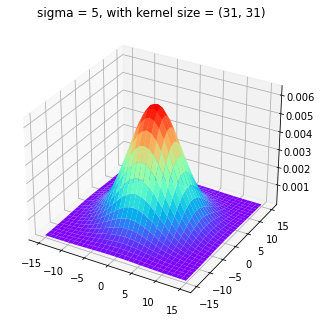

In [4]:
visualize((31,31),5)

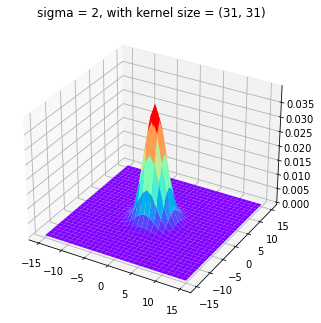

In [5]:
visualize((31,31), 2)

In [6]:
def getGaussianBlur(image, ksize=5, sigma=1):
    rows, cols = image.shape
    padding = ksize - 1
    kernel = getGaussianKernel(ksize, ksize, sigma)
    imgTmp = np.zeros([rows+2*padding, cols+2*padding])
    imgTmp[padding:rows+padding, padding:cols+padding] = image[:, :]
    output = np.zeros([rows+2*(ksize//2), cols+2*(ksize//2)])
    for i in range(rows+2*(ksize//2)):
        for j in range(cols+2*(ksize//2)):
            output[i][j] = np.sum(kernel * imgTmp[i:i+ksize, j:j+ksize])
    return output

In [7]:
def getGradImage(image):
    rows, cols = image.shape
    sobelx = np.array([[-1,  0, 1],
                       [-2,  0,  2],
                       [-1,  0,  1]])

    sobely = np.array([[-1, -2, -1],
                       [0 ,  0,  0],
                       [1 ,  2,  1]])
        
    def sobelConv(image, sobel):
        imgTmp = np.zeros([rows+4, cols+4])
        imgTmp[2:rows+2, 2:cols+2] = image[:, :]
        output = np.zeros([rows+2, cols+2])
        for i in range(0, rows+2):
            for j in range(0, cols+2):
                tmpi = i + 1
                tmpj = j + 1
                for u in range(-1, 2):
                    for v in range(-1, 2):
                        output[i][j] += sobel[1+u][1+v] * imgTmp[tmpi-u][tmpj-v]
        
        return output
    
    gradx = sobelConv(image, sobelx)
    grady = sobelConv(image, sobely)
    
    return np.sqrt(gradx**2 + grady**2)

In [71]:
def edgeDetection(gradImage):
    rows, cols = gradImage.shape
    currTau = np.sum(gradImage) / (rows * cols)
    prevTau = -1
    edges = []
    output = np.zeros((rows, cols))
    while prevTau == -1 or abs(currTau - prevTau) > 0.001:
#         print(abs(currTau - prevTau))
        output = np.zeros((rows, cols))
        Lval = []
        Hval = []
        for i in range(rows):
            for j in range(cols):
                if gradImage[i][j] < currTau:
                    Lval.append(gradImage[i][j])
                    output[i][j] = 0
                else:
                    Hval.append(gradImage[i][j])
                    output[i][j] = 255
        prevTau = currTau
        currTau = (sum(Hval)/len(Hval) + sum(Lval)/len(Lval)) / 2
    
    return output

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2125, 0.7154, 0.0721])

In [10]:
def getResult(path):
    image = mpimg.imread(path)
    
    grayImage = rgb2gray(image)
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title('Gray Image')
    plt.imshow(grayImage, cmap='gray')
    plt.show()
    
    print("Get gray image.")
    blurredImage = getGaussianBlur(grayImage, sigma=2)
    print("Get blurred image.")
    gradImage = getGradImage(blurredImage)
    shownGradImage = gradImage / np.max(gradImage) * 255.0
    print("Get gradient image.")
    edgesImage = edgeDetection(gradImage)
    print("Get final edge image.")
#     plt.subplot(2, 2, 1)
#     plt.imshow(grayImage, cmap='gray')
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.title('Blurred Image')
    plt.imshow(blurredImage, cmap='gray')
    plt.subplot(1, 3, 2)
    plt.title('Gradient Image')
    plt.imshow(shownGradImage, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title('Edges Image')
    plt.imshow(edgesImage, cmap='gray')
    
    plt.show()

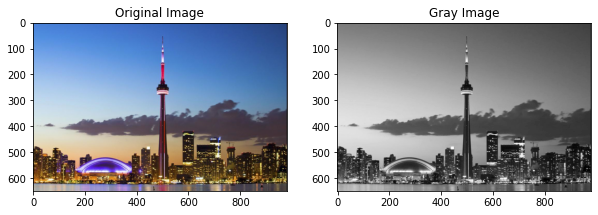

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


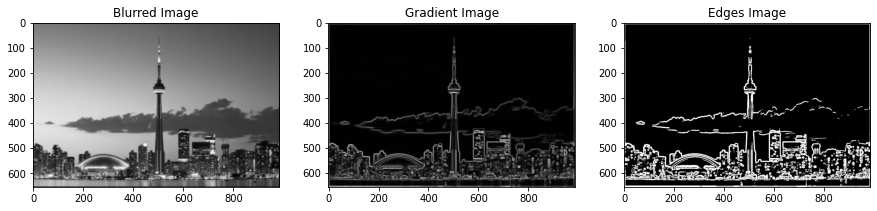

In [11]:
getResult('Q4_image_1.jpg')

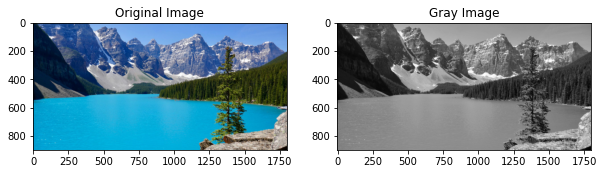

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


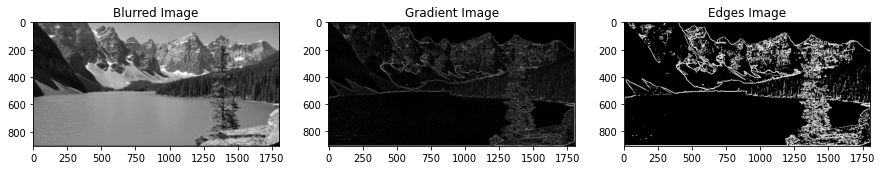

In [12]:
getResult('Q4_image_2.jpg')

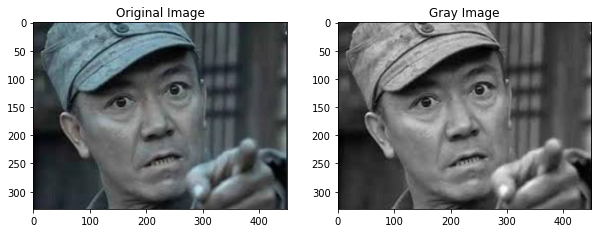

Get gray image.
Get blurred image.
Get gradient image.
Get final edge image.


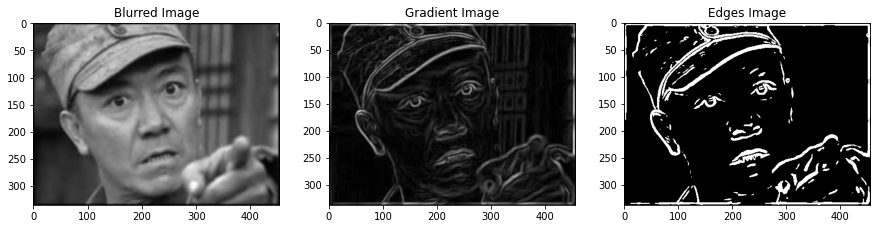

In [13]:
getResult('Yunlong.png')

## Q5) & Q6)

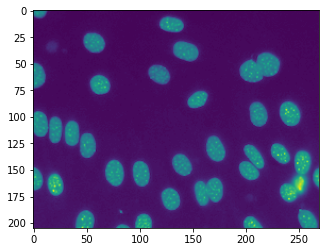

In [27]:
image = mpimg.imread('Q6.png')
plt.imshow(image)

In [72]:
binaryImage = edgeDetection(image)

In [65]:
def CCL(image):
    BACKGROUND = 0
    FOREGROUND = 255
    
    rows, cols = image.shape
    currLabel = 1
    labelledImage = np.zeros_like(image)
    for i in range(rows):
        for j in range(cols):
            # background or has been labelled before
            if image[i][j] == BACKGROUND or labelledImage[i][j] != 0:
                continue
            
            # current pixel is foreground pixel
            q = queue.Queue()
            labelledImage[i][j] = currLabel
            q.put( (i, j) )
            while not q.empty():
                x, y = q.get()
                
                # consider the surrounding 8 pixels
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        # if it equals to itself then don't need to consider
                        if dx == 0 and dy == 0:
                            continue
                        currx = x + dx
                        curry = y + dy
                        # in the image and it is foreground pixel and hasn't been labelled yet.
                        if 0 <= currx and currx < rows and 0 <= curry and curry < cols:
#                             print(1)
                            if image[currx][curry] == FOREGROUND and labelledImage[currx][curry] == 0:
#                                 print( (curri, currj) )
                                labelledImage[currx][curry] = currLabel
                                q.put( (currx, curry) )
            
            currLabel += 1
    
    return labelledImage, currLabel-1

In [73]:
cclImage, numLabel = CCL(binaryImage)
numLabel

32

In [68]:
cclImage

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 27., 27.,  0.],
       [ 0.,  0.,  0., ..., 27., 27.,  0.],
       [ 0.,  0.,  0., ..., 27.,  0.,  0.]])

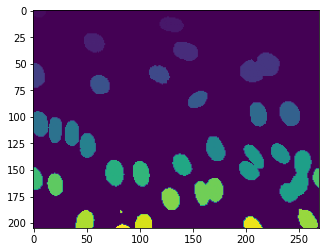

In [74]:
plt.imshow(cclImage)